**Introduction**

To provide a useful but relatively simple example of machine learning with TensorFlow, you will create a neural network with only an input and output layer that learns the relationship between two variables, x and y. The neural network will predict the value of y for a given value of x once you train the network. x and y could represent any numerical value, such as the heart rate and cholesterol level, or age and income level. For this Lab Step, the data used for training is randomly generated by perturbing values around a known linear function between x and y. The known linear function can be written as y = a*x + b where a is the slope of the line and b is the intercept. The following image depicts the function:

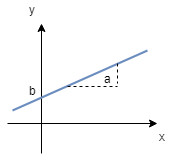

In the example, a=0.5 and b=2. After training the neural network, the predicted values should closely match the values of the known function.

 

**Neural Network Review**


This section briefly reviews what you need to know about neural networks to understand the example in this Lab Step. A neural network is made up of layers. Every neural network has input and output layers. The layers in between the input and output layer are called hidden layers. Each layer is comprised of one or more neurons. Each neuron in the hidden and output layers takes output values from the previous layer's neurons as input. A diagram of a neural network with one hidden layer with four neurons is as follows:
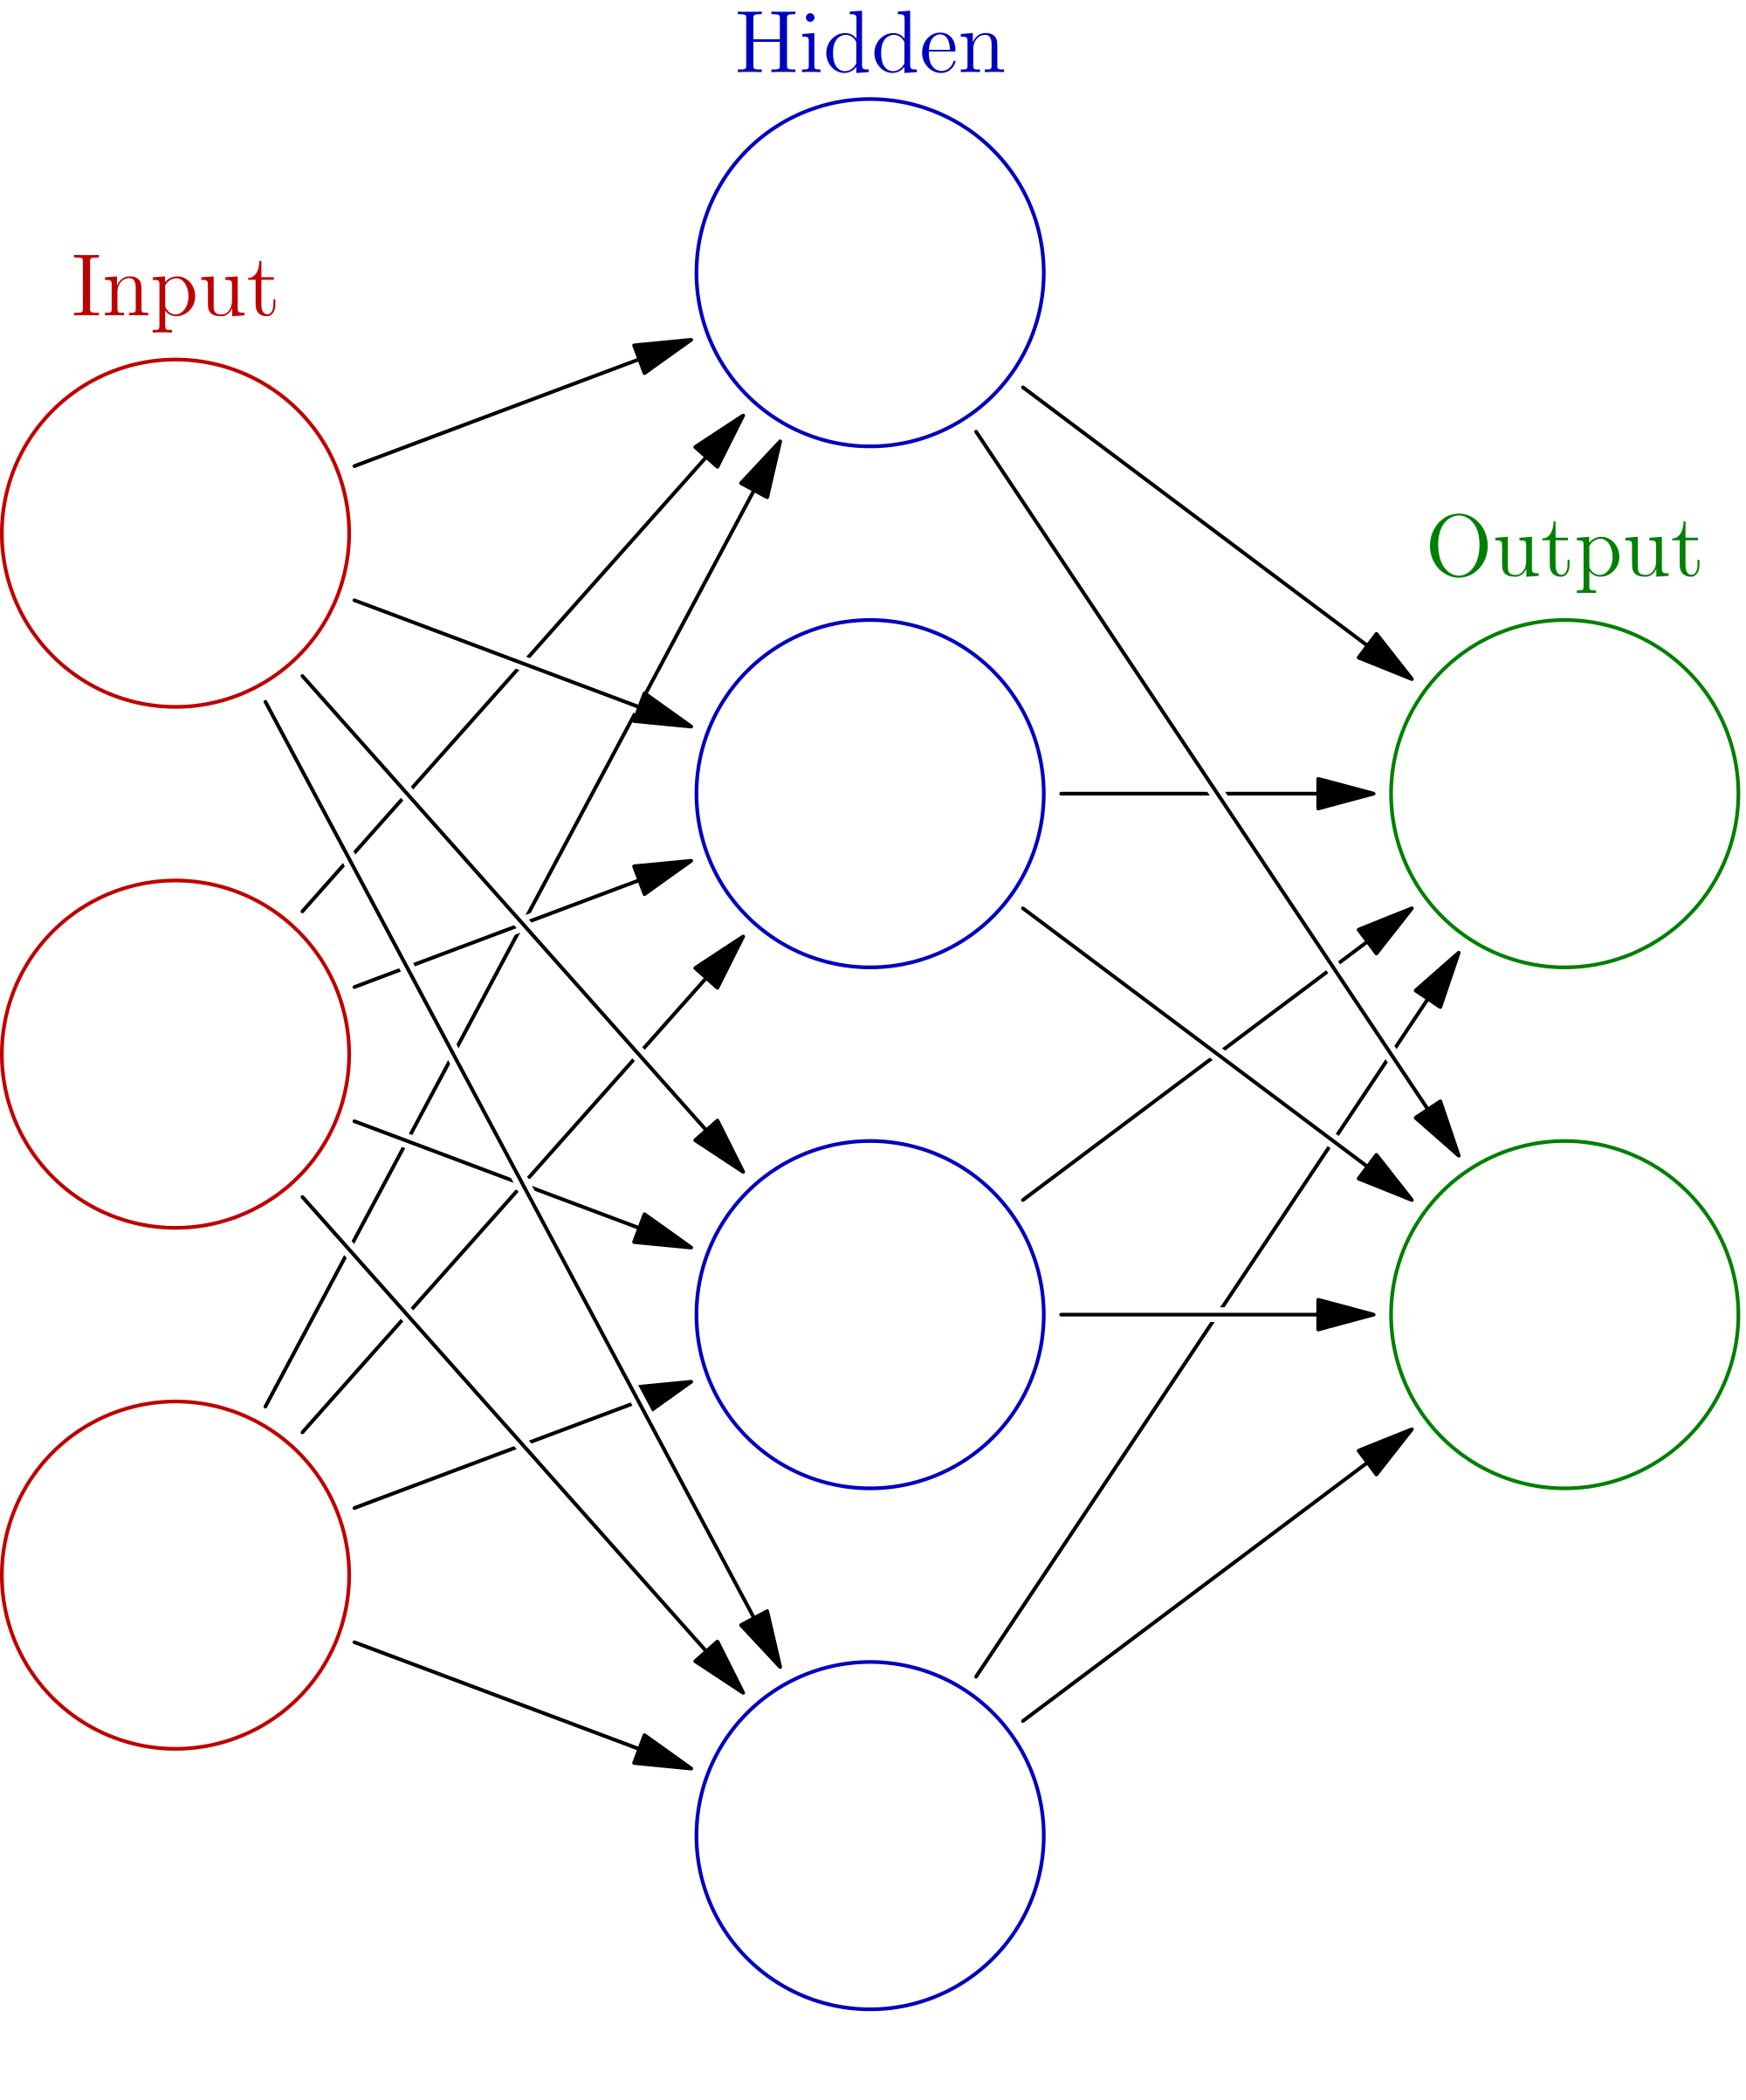

Each input to a neuron in the hidden and output layers is multiplied by a weight. The sum of the multiplication results are added with a bias value to produce the output value of the neuron. In linear algebra the inputs to a neuron and the neuron's weights can be represented as vectors. To multiply the weights by the inputs and add them up, you can use a dot product or inner operation. To perform all of the operations of a layer at once, you can represent each neuron's weights in a matrix and each neuron's bias in a vector.  The complete operation for a hidden layer is then multiplying the weight matrix by the input vector and adding the bias vector. This is how values flow through the neural network. You can see how similar it is to a dataflow graph in TensorFlow. The bias can be represented as an input that is always 1 and the neuron has a bias weight like it does for any other input. This reduces the operation of a layer to just multiplying a matrix by a vector. Training is a bit more complicated and has values flowing in the opposite direction. You don't need to know the details because TensorFlow wraps the complexities of training into functions that it provides.

A single neuron is able to learn linear relationships so the neural network in this example only needs one neuron. That's why the neural network doesn't need any hidden layers, which are required to learn more complex relationships in the data.

In [1]:
'''Single neuron neural network'''

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Draw plots inline in the notebook
%matplotlib inline

# Set up sample points perturbed away from the ideal linear relationship 
# y = 0.5*x + 2.5
num_examples = 60
points = np.array([np.linspace(-1, 5, num_examples),
  np.linspace(2, 5, num_examples)])
points += np.random.randn(2, num_examples)
x, y = points
# Include a 1 to use as the bias input for neurons
x_with_bias = np.array([(1., d) for d in x]).astype(np.float32)

In [3]:
# Training parameters
training_steps = 100
learning_rate = 0.001
losses = []

In [4]:
with tf.Session():
  # Set up all the tensors, variables, and operations.
  input = tf.constant(x_with_bias)
  target = tf.constant(np.transpose([y]).astype(np.float32))
  # Initialize weights with small random values
  weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

  tf.global_variables_initializer().run()

  # Calculate the current prediction error
  y_predicted = tf.matmul(input, weights)
  y_error = tf.subtract(y_predicted, target)

  # Compute the L2 loss function of the error
  loss = tf.nn.l2_loss(y_error)

  # Train the network using an optimizer that minimizes the loss function
  update_weights = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(loss)

  for _ in range(training_steps):
    # Repeatedly run the operations, updating the TensorFlow variable.
    update_weights.run()
    losses.append(loss.eval())

  # Training is done, get the final values for the graphs
  w = weights.eval()
  y_predicted = y_predicted.eval()

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
weights
loss

<tf.Tensor 'L2Loss:0' shape=() dtype=float32>

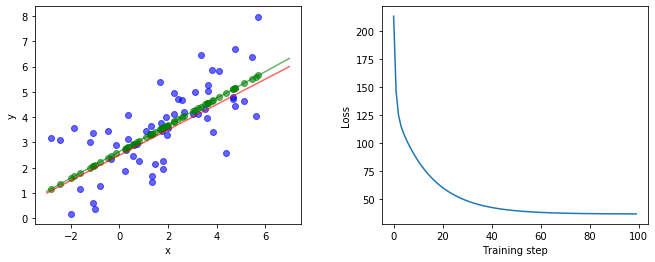

In [9]:
# Show the fit and the loss over time.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(11, 4)
# Plot the perturbed points in blue dots
ax1.scatter(x, y, c="b", alpha=.6)
# Plot the predicted values in green dots
ax1.scatter(x, np.transpose(y_predicted)[0], c="g", alpha=0.6)

line_x_range = (-3, 7)
# Plot the predicted line in green
ax1.plot(line_x_range, [w[1] * x + w[0]
                       for x in line_x_range], "g", alpha=0.6)
# Plot the noise-free line (0.5*x + 2.5) in red
ax1.plot(line_x_range, [0.5 * x + 2.5
                        for x in line_x_range], "r", alpha=0.6)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax2.plot(range(0, training_steps), losses)
ax2.set_xlabel("Training step")
ax2.set_ylabel("Loss")
plt.show()

The code concerning TensorFlow is all inside the with tf.Session(): block. 

There are a few functions that you haven't seen before but their names accurately describe what they do. TensorFlow provides several loss functions and training algoritms. The tf.nn.l2_loss is a common choice, while the tf.train.GradientDescentOptimizer is also popular but usually not the most efficient training algorithm. It is what more advanced algorithms are based upon. 

Take a moment to analyze the plots, your plots will be different due to the random nature of the code but they should resemble the following:

**Summary**

In this Lab Step, you created and trained a neural network and used it to predict values of a function given noisy point samples. The example was fairly simple, but a larger neural network with more layers and neurons would mainly just need to have additional matmul operations and larger dimension variables. 

At this point, it's worth mentioning that TensorFlow includes several customizable models in a high-level API called Estimators. The estimators include deep neural network regressors and classifiers. Using an estimator can dramatically reduce the amount of code required but still give you a model that performs well in most cases. To learn more about estimators, check out this overview  https://www.tensorflow.org/api_docs/python/tf/estimator